In [1]:
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'


In [2]:
path=datasets.download_data(MNIST_URL);

In [25]:
path=Path('/Users/lingling26/.fastai/data/mnist.pkl')

In [26]:
#with gzip.open(path, 'rb') as f:
 #   ((x_train, y_train), (x_valid, y_valid), _) = 
with open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

把numpy转换成tensor, 因为tensor的计算可以直接适用gpu

In [27]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))

查看x_train的行数，列数

In [28]:
n,c = x_train.shape

y_train.min() max()返回的是label的min和max

In [29]:
x_train,x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

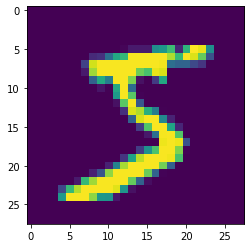

In [30]:
x_train[0]
img = x_train[0]
plt.imshow(img.view(28,28))

In [31]:
assert n==y_train.shape[0]==50000

In [32]:
n

50000

In [33]:
img=x_train[0]

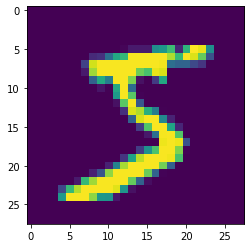

In [34]:
plt.imshow(img.view(28,28))

%开头，可以直接调用系统命令

In [35]:
%time

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs


In [36]:
%ls

course-v3/       fastai/          mnist_toy.ipynb


In [37]:
weights=torch.randn(784,10)

In [38]:
bias=torch.zeros(784)

矩阵乘法

In [17]:
def matmul(a, b):
    ar,ac=a.shape
    br,bc=b.shape
    assert ac==br
    c=torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j]+=a[i,k]*b[k,j]
    return c

In [39]:
m1=x_valid[:5]
m2=weights
m2.shape

torch.Size([784, 10])

%time 加个代码，返回这个代码的耗时

In [19]:
%timeit -n 10 _=matmul(m1, m2)

940 ms ± 53.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

  ==, >, < ,  +, -, *, / 这几种运算都是elementwise的

In [21]:
a-b

tensor([  8.,  -2., -11.])

In [22]:
a>b

tensor([ True, False, False])

In [23]:
(a>b).float().mean()

tensor(0.3333)

In [24]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [25]:
m*m

tensor([[ 1.,  4.,  9.],
        [16., 25., 36.],
        [49., 64., 81.]])

$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$

公式怎么写？从wikipedia选中公式，点击edit, 进入编辑模式，然后再双击公式，就可以打开公式的latex代码，然后粘到notebook里，前后用$$符号包起来就口以了

上面这个公式是矩阵的Frobenius norm, 这个norm的算法是对每个元素自己求平方，然后再把平方后的矩阵的迹开方

In [26]:
(m*m).sum().sqrt()

tensor(16.8819)

上边这个公式就求得了m的frobenius norm

另一种写法实现矩阵乘法

In [27]:
def matmul(a,b):
    ar,ac=a.shape
    br,bc=b.shape
    assert ac==br
    c=torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j]=(a[i,:]*b[:,j]).sum()
    return c

In [28]:
%time matmul(m1,m2)

CPU times: user 3.16 ms, sys: 1.47 ms, total: 4.63 ms
Wall time: 3.26 ms


tensor([[ -3.5064,  -3.2836,  -3.2040,  11.8019, -16.4798,   6.4320,   2.1578,
          -2.9053,  -3.3426,  -2.6554],
        [ -1.7926,  -7.0870, -17.1044,  17.3391, -17.6860,  14.7011,   2.9271,
           5.8347,   2.4488, -14.1471],
        [  2.4719,  -4.2554,  -0.9991,  -0.8746,  -8.9437,   2.5609,   4.4078,
           6.8025,   3.2772,  -9.7618],
        [ -3.6332,   0.0820, -13.5540,   2.2403, -12.5972,  -3.9227,   1.1174,
          16.7461,  -8.2734,  -1.2328],
        [ 10.6605,  -2.9814,  -5.6513,  11.8054,  -1.8577,   9.4457,   0.2691,
          17.9098,  -2.1191,  -7.8942]])

对比一下这种实现方式和之前的，性能差别大大的！之前600ms, 现在3.5ms

In [29]:
%timeit -n 10 _=matmul(m1, m2)

1.38 ms ± 313 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


timeit是python3的性能分析小工具；加上-n参数表示重复执行

# broadcasting

The term **broadcasting** describes how arrays with different shapes are treated during arithmetic operations.  The term broadcasting was first used by Numpy.

From the [Numpy Documentation](https://docs.scipy.org/doc/numpy-1.10.0/user/basics.broadcasting.html):

    The term broadcasting describes how numpy treats arrays with 
    different shapes during arithmetic operations. Subject to certain 
    constraints, the smaller array is “broadcast” across the larger 
    array so that they have compatible shapes. Broadcasting provides a 
    means of vectorizing array operations so that looping occurs in C
    instead of Python. It does this without making needless copies of 
    data and usually leads to efficient algorithm implementations.
    
In addition to the efficiency of broadcasting, it allows developers to write less code, which typically leads to fewer errors.

*This section was adapted from [Chapter 4](http://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/4.%20Compressed%20Sensing%20of%20CT%20Scans%20with%20Robust%20Regression.ipynb#4.-Compressed-Sensing-of-CT-Scans-with-Robust-Regression) of the fast.ai [Computational Linear Algebra](https://github.com/fastai/numerical-linear-algebra) course.*

In [42]:
a

tensor([10.,  6., -4.])

啥叫广播，就是numpy为了解决tensor之间计算维度不匹配的问题，把维度较小的那个tensor(标量也是一种特殊的tensor)扩展成维度跟较大的那个tensor匹配进行计算，而这个“扩展”实际上并没有进行数据的拷贝，因此，运算速度更高。而且，代码写起来非常的简便，代码越少，写出bug的可能性也相对较小

In [45]:
a>0
(a>0).float()

tensor([1., 1., 0.])

上边这个就是一个广播，0是较小的那个tensor, a是较大的那个，把0扩展成[0,0,0]     
下边这些个同理了

In [48]:
a+1

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

In [47]:
2* m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

再看一下非标量的情况

In [52]:
c = tensor([10.,20,30]);
m


tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [50]:
m+c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [55]:
t=c.expand_as(m)
t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [58]:
t.shape
t.storage()

 10.0
 20.0
 30.0
[torch.FloatStorage of size 3]

这说明啥，像expand, suqeeze这类操作并不会实际的进行拷贝操作，这类操作只是为了broadcast的时候，shape是匹配的

In [60]:
c.unsqueeze(0)
c.shape

torch.Size([3])

unsqueeze()操作的参数表示在第几个维度上unsqueeze一个新的维度，c本来的shape是[3], 在第0个位置unsqueeze一个1，变成[1,3]

In [62]:
c.unsqueeze(1).shape

torch.Size([3, 1])

除了用unsqueeze, expand操作改变维度之外，还可以直接用None改变维度, None就相当于插入的那个维度占位符; 冒号和...的作用相同

In [65]:
c[None].shape,c[:,None].shape,c[...,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]), torch.Size([3, 1]))

expand_as()函数一个很重要的作用是帮我们理解，当c对m broadcasting的时候，c会变成什么样子

In [66]:
c[:,None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

使用broadcast进行矩阵乘法

In [30]:
m1, m2

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[-1.1421, -0.0997, -0.6440,  ...,  0.5427, -1.6444, -1.8249],
         [-0.5757, -0.8346, -0.7735,  ...,  0.5527, -1.0494,  0.2848],
         [-1.5119,  0.5758, -1.7945,  ...,  1.3708,  0.1237, -0.5208],
         ...,
         [-0.0105, -0.6546,  0.2948,  ...,  0.5188, -0.0444,  2.5322],
         [-0.8177,  1.0126,  0.4003,  ..., -0.0849, -1.6510,  0.9389],
         [-0.2126,  0.2513,  0.8615,  ...,  0.6116,  0.5069,  1.0515]]))

In [84]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    c = torch.zeros(ar, bc)
    assert ac == br
    for i in range(ar):
        #c[i,]=(a[i,].unsqueeze(-1)*b).sum(dim=0)
        my_row=a[i,]
        c[i,]=(my_row[:,None]*b).sum(dim=0)
    return c

unsqueeze(-1)表示在最后一列插入

In [89]:
my_row=m1[0,]
(my_row[:,None]*m2).shape

torch.Size([784, 10])

sum()的参数dim表示在shape的第几个维度求和，比如上面这个shape是[784,3], dim=0的时候，在784这个维度上求和(就是784个数加起来)，dim=1, 则在3这个维度上求和

In [85]:
matmul(m1,m2)

tensor([[ -3.5064,  -3.2836,  -3.2040,  11.8019, -16.4798,   6.4320,   2.1578,
          -2.9053,  -3.3426,  -2.6554],
        [ -1.7926,  -7.0870, -17.1044,  17.3391, -17.6860,  14.7011,   2.9271,
           5.8347,   2.4488, -14.1471],
        [  2.4719,  -4.2554,  -0.9991,  -0.8746,  -8.9437,   2.5609,   4.4078,
           6.8025,   3.2772,  -9.7618],
        [ -3.6332,   0.0820, -13.5540,   2.2403, -12.5972,  -3.9227,   1.1174,
          16.7461,  -8.2734,  -1.2328],
        [ 10.6605,  -2.9814,  -5.6513,  11.8054,  -1.8577,   9.4457,   0.2691,
          17.9098,  -2.1191,  -7.8942]])

注意我们这里就采用了broadcast的方法进行计算，具体能快多少呢？

In [90]:
%timeit -n 10 _ = matmul(m1,m2)

259 µs ± 71.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


woo!! 现在是微秒级的！这告诉我们什么呢？以后写代码的时候，能用这些broadcast一定要用

# broadcasting rule

In [9]:
c = tensor([10.,20,30]);

In [10]:
c[None,:]

tensor([[10., 20., 30.]])

In [11]:
c[:,None]

tensor([[10.],
        [20.],
        [30.]])

In [14]:
c_2=c[None,:]*c[:,None]

当进行tensor的运算时，pytorch比较2个tensor之间的shape
broadcasting的规则：     
1. 当shape相同时，直接进行element-wise运算。  
2. 当shape不同时，大小为1的维度会被扩展成可以匹配的维度。  
例如上面的c[None,:] 的shape[1,3]就被扩展成[3,3]; c[:,None]的shape [3,1] 就被扩展成[3,3]; 扩展的方式就是在1的维度上复制这个tensor

In [17]:
c[None].expand_as(c_2)

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [18]:
c[:,None].expand_as(c_2)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

In [20]:
(c[None]>c[:,None]).float()

tensor([[0., 1., 1.],
        [0., 0., 1.],
        [0., 0., 0.]])

# Einstein summation

einstein summation 缩写einsum, 是tensor计算的有一种简便符号, 比如矩阵乘法，用最原始的方法是下面注视的写法，用einsum就是把下标拿出来，赋值的部分挪到后边，用一个箭头指向，然后写成一个string    
最后在运算的时候，einsum表达式里边，重复的符号（这个例子是k）, 则会在这个重复的符号的这个维度上，进行dot product运算。  

In [43]:
# c[i,j] += a[i, k] * b[k,j]
def matmul(a,b):
    return torch.einsum('ik,kj->ij',a,b)

In [44]:
m1.shape

torch.Size([5, 784])

In [45]:
%timeit -n 10 _ = matmul(m1,m2)

60.4 µs ± 21.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


这玩意比broadcasting还快！！

# pytorch op

想矩阵乘法这种最基础常见的运算，pytorch已经为我们封装好了

In [46]:
%timeit -n 10 _=m1.matmul(m2)

The slowest run took 53.09 times longer than the fastest. This could mean that an intermediate result is being cached.
66.7 µs ± 141 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [48]:
%timeit -n 10 _=m1@m2

The slowest run took 10.88 times longer than the fastest. This could mean that an intermediate result is being cached.
15.1 µs ± 18.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


上面2个算法是等价的，调用的是pytorch同一套程序；有没有发现这个@运算更快！！因为pytorch还进行了内存优化。  